<a href="https://colab.research.google.com/github/USharpUtsav/Basic-Clone-/blob/main/ResearchImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/final_covid_health_combined.csv")
df.head()

,total_cases,new_cases,total_cases_per_million,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,handwashing_facilities,code,continent,country,date,population,CountryCode,AverageObesity,AvgAlcohol2000_2020,AverageSmokersAdults
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.214695,AFG,Asia,AFGHANISTAN,2020-01-09,40578801.0,AFG,3.04,0.00000,27.94
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.804100,DZA,Africa,ALGERIA,2020-01-09,45477339.0,DZA,20.27,0.44286,21.37
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.304024,AZE,Asia,AZERBAIJAN,2020-01-09,10295256.0,AZE,15.28,0.67143,25.73
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,BHR,Asia,BAHRAIN,2020-01-09,1533408.0,BHR,24.32,1.98095,17.43
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.728539,BGD,Asia,BANGLADESH,2020-01-09,169384838.0,BGD,2.05,0.00476,42.27


In [ ]:
df=df.drop(['code','CountryCode'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56546 entries, 0 to 56545
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_cases                      56546 non-null  float64
 1   new_cases                        56546 non-null  float64
 2   total_cases_per_million          56546 non-null  float64
 3   new_cases_smoothed               56546 non-null  float64
 4   new_cases_per_million            56546 non-null  float64
 5   new_cases_smoothed_per_million   56546 non-null  float64
 6   total_deaths                     56546 non-null  float64
 7   new_deaths                       56546 non-null  float64
 8   new_deaths_smoothed              56546 non-null  float64
 9   total_deaths_per_million         56546 non-null  float64
 10  new_deaths_per_million           56546 non-null  float64
 11  new_deaths_smoothed_per_million  56546 non-null  float64
 12  population_density

In [ ]:
(df == 0).sum() / len(df)

,0
total_cases,0.097124
new_cases,0.275103
total_cases_per_million,0.097124
new_cases_smoothed,0.136155
new_cases_per_million,0.275103
new_cases_smoothed_per_million,0.136155
total_deaths,0.145881
new_deaths,0.511919
new_deaths_smoothed,0.320465
total_deaths_per_million,0.145881


In [ ]:
sparse_features = ['total_cases','new_cases','total_cases_per_million', 'new_deaths', 'new_cases_smoothed','total_deaths_per_million',
                  'new_deaths_smoothed', 'new_cases_per_million','new_cases_smoothed_per_million','total_deaths','new_deaths','new_deaths_smoothed_per_million',
                  'new_deaths_per_million']

temporal_features = ['date']

static_features = ['population_density', 'median_age', 'hospital_beds_per_thousand','diabetes_prevalence','handwashing_facilities','population',
                  'gdp_per_capita', 'stringency_index','AverageObesity','AvgAlcohol2000_2020','AverageSmokersAdults']

categorical_features = ['country', 'continent']

CATEGORICAL FEATURE ENCODING

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
from category_encoders import JamesSteinEncoder

cat_cols = ['continent', 'country']
target_col = 'new_cases'  # choose any main prediction target

encoder = JamesSteinEncoder(cols=cat_cols)
df[cat_cols] = encoder.fit_transform(df[cat_cols], df[target_col])


In [ ]:
df.head()

,total_cases,new_cases,total_cases_per_million,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,stringency_index,hospital_beds_per_thousand,handwashing_facilities,continent,country,date,population,AverageObesity,AvgAlcohol2000_2020,AverageSmokersAdults
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.39,48.214695,5270.750301,190.817481,2020-01-09,40578801.0,3.04,0.00000,27.94
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.90,84.804100,238.463463,249.331451,2020-01-09,45477339.0,20.27,0.44286,21.37
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.82,89.304024,5270.750301,760.025695,2020-01-09,10295256.0,15.28,0.67143,25.73
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.74,100.000000,5270.750301,640.704134,2020-01-09,1533408.0,24.32,1.98095,17.43
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.79,61.728539,5270.750301,1875.336647,2020-01-09,169384838.0,2.05,0.00476,42.27


**HANDLING TEMPORAL DATA**

In [ ]:
import numpy as np
df['date'] = pd.to_datetime(df['date'])
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days.astype(np.float32)
df['days_norm'] = df['days_since_start'] / 365.0  # Normalize to years


In [ ]:
frequencies = [1, 2, 4, 8]
for i, c in enumerate(frequencies):
    df[f'days_sin_{c}'] = np.sin(2 * np.pi * c * df['days_norm'])
    df[f'days_cos_{c}'] = np.cos(2 * np.pi * c * df['days_norm'])

Key Implementation Details:
COVID-Specific PLE:

Custom bins for each sparse feature based on COVID data distribution

Special handling for zero values (treated as meaningful, not missing)

Linear interpolation between bins exactly as per the paper's formulation

Periodic Encoding:

Initialized with COVID-relevant frequencies (weekly, monthly, yearly)

Learnable frequencies adapt to local patterns

Concatenated sin/cos outputs as specified

DSAN Integration:

Denoising via random masking of sparse features

Sparse feature adjustments through learned masks

Self-attention over all embedded features

**For static numeric values apply Piecewise Linear Encoding**



In [ ]:
import numpy as np

def generate_bins_by_quantiles(df, features, num_bins=6):
    """
    Generate bin edges for each feature based on quantiles.

    Args:
        df (pd.DataFrame): Your dataset.
        features (list): List of feature names to bin.
        num_bins (int): Number of bins desired (including min and max).

    Returns:
        dict: feature_name -> list of bin edges
    """
    bins_dict = {}
    for col in features:
        # Calculate quantiles, linspace from 0 to 1, e.g. [0%, 20%, 40%, 60%, 80%, 100%] for 6 bins
        quantiles = np.quantile(df[col].dropna(), np.linspace(0, 1, num_bins))

        # To ensure uniqueness and monotonicity of bins (remove duplicates)
        bins = sorted(set(quantiles))

        # If duplicates reduced number of bins, you can add small offsets or handle separately
        bins_dict[col] = bins

    return bins_dict

# Usage:
static_features = ['population_density', 'median_age', 'hospital_beds_per_thousand',
                   'diabetes_prevalence', 'handwashing_facilities', 'gdp_per_capita', 'stringency_index']

bins = generate_bins_by_quantiles(df, static_features, num_bins=6)
print(bins)


{'population_density': [np.float64(2.173968315124512), np.float64(36.265621185302734), np.float64(71.7662124633789), np.float64(145.689208984375), np.float64(262.1512451171875), np.float64(1941.0228271484373)], 'median_age': [np.float64(15.10200023651123), np.float64(20.093000411987305), np.float64(24.975000381469727), np.float64(27.475000381469727), np.float64(31.18099975585937), np.float64(44.55899810791016)], 'hospital_beds_per_thousand': [np.float64(0.3000000119209289), np.float64(0.7900000214576721), np.float64(1.100000023841858), np.float64(1.7100000381469729), np.float64(3.490000009536743), np.float64(8.0)], 'diabetes_prevalence': [np.float64(1.899999976158142), np.float64(5.699999809265137), np.float64(7.099999904632568), np.float64(9.600000381469728), np.float64(13.100000381469728), np.float64(30.799999237060547)], 'handwashing_facilities': [np.float64(6.303589820861816), np.float64(41.68938827514648), np.float64(76.2647933959961), np.float64(85.34632873535156), np.float64(91.

**What the PLE implementation will do:
For each numeric value in a column, find which bin interval it belongs to.
Calculate interpolation weight (alpha) between the lower and upper bin edges.
Get embeddings for the lower and upper bin indices.
Interpolate between those embeddings using alpha.**

In [ ]:
def compute_bin_indices_and_alpha(series, bins):
    bins = np.array(bins)
    values = series.copy()

    zero_mask = (values == 0)
    # Replace zeros with tiny value for bin lookup
    values_clamped = values.replace(0, 1e-6)

    upper_idx = np.searchsorted(bins, values_clamped, side='right')
    upper_idx = np.clip(upper_idx, 1, len(bins)-1)
    lower_idx = upper_idx - 1

    # For zeros assign both indices to 0
    lower_idx[zero_mask] = 0
    upper_idx[zero_mask] = 0

    lower_bounds = bins[lower_idx]
    upper_bounds = bins[upper_idx]

    alpha = (values_clamped - lower_bounds) / (upper_bounds - lower_bounds + 1e-6)
    alpha[zero_mask] = 0

    return lower_idx, upper_idx, alpha

In [ ]:
def generate_sparse_bins(df, sparse_features, num_bins=6):
    bins_dict = {}
    for col in sparse_features:
        # Extract non-zero values
        nonzero_vals = df.loc[df[col] > 0, col]

        if len(nonzero_vals) == 0:
            # All zeros? Just one bin for zero
            bins = [0, 1]
        else:
            # Compute quantiles for non-zero data
            quantiles = np.quantile(nonzero_vals, np.linspace(0, 1, num_bins))
            quantiles = sorted(set(quantiles))  # Remove duplicates if any

            # Prepend zero if not already present to handle zeros explicitly
            if quantiles[0] > 0:
                bins = [0] + quantiles
            else:
                bins = quantiles

        bins_dict[col] = bins
    return bins_dict


In [ ]:
sparse_bins = generate_sparse_bins(df, sparse_features, num_bins=6)

for feature in sparse_features:
    bins = sparse_bins[feature]
    lower_col = f"{feature}_lower_bin"
    upper_col = f"{feature}_upper_bin"
    alpha_col = f"{feature}_alpha"

    df[lower_col], df[upper_col], df[alpha_col] = compute_bin_indices_and_alpha(df[feature], bins)


In [ ]:
df.sample(10)

,total_cases,new_cases,total_cases_per_million,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,new_cases_smoothed_per_million_alpha,total_deaths_lower_bin,total_deaths_upper_bin,total_deaths_alpha,new_deaths_smoothed_per_million_lower_bin,new_deaths_smoothed_per_million_upper_bin,new_deaths_smoothed_per_million_alpha,new_deaths_per_million_lower_bin,new_deaths_per_million_upper_bin,new_deaths_per_million_alpha
20574,12037.0,24.0,29891.40600,18.428572,59.599050,45.763554,306.0,0.0,0.714286,759.887900,...,0.414213,2,3,0.052356,5,6,0.001727,0,0,0.000000
34882,116258.0,0.0,18511.62700,405.142850,0.000000,64.510430,3695.0,5.0,6.857143,588.350600,...,0.729474,3,4,0.701706,4,5,0.507622,3,4,0.953074
14006,42684.0,885.0,6313.82860,779.714300,130.909440,115.335540,890.0,21.0,18.428572,131.649030,...,0.006164,2,3,0.561955,5,6,0.014552,5,6,0.001323
49958,992838.0,983.0,55702.75800,905.142900,55.150803,50.782658,35824.0,6.0,1.857143,2009.890500,...,0.498618,5,6,0.037062,2,3,0.493798,3,4,0.065218
48956,187442.0,396.0,4619.21000,241.857150,9.758790,5.960185,7752.0,0.0,0.571429,191.035700,...,0.039951,4,5,0.254317,1,2,0.336317,0,0,0.000000
45662,5825774.0,3676.0,45296.90600,2792.857200,28.581856,21.715189,326143.0,8.0,5.000000,2535.846400,...,0.009800,5,6,0.601967,1,2,0.932722,1,2,0.638556
1349,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
53231,6309716.0,548.0,121955.41400,78.285710,10.591850,1.513122,141837.0,10.0,1.428572,2741.453100,...,0.118618,5,6,0.243343,1,2,0.661763,2,3,0.467641
12787,32.0,0.0,34.80614,0.142857,0.000000,0.155385,2.0,0.0,0.000000,2.175384,...,0.155362,1,2,0.004082,0,0,0.000000,0,0,0.000000
21374,11016434.0,10584.0,7728.53560,12960.571000,7.425163,9.092438,156463.0,78.0,92.857140,109.766000,...,0.238149,5,6,0.271802,2,3,0.185376,1,2,0.560876


ENCODED DATAFRAME:-

In [ ]:
# List of columns to drop
cols_to_drop = sparse_features + temporal_features + static_features

# Create a new DataFrame with those columns removed
df_encoded = df.drop(columns=cols_to_drop)

# Optional: Verify
print("Original shape:", df.shape)
print("New shape:", df_encoded.shape)
print("Removed columns:", cols_to_drop)


Original shape: (56546, 72)
New shape: (56546, 52)
Removed columns: ['total_cases', 'new_cases', 'total_cases_per_million', 'new_deaths', 'new_cases_smoothed', 'total_deaths_per_million', 'new_deaths_smoothed', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed_per_million', 'new_deaths_per_million', 'date', 'population_density', 'median_age', 'hospital_beds_per_thousand', 'diabetes_prevalence', 'handwashing_facilities', 'gdp_per_capita', 'stringency_index']


In [ ]:
df_encoded.head()

,continent,country,population,AverageObesity,AvgAlcohol2000_2020,AverageSmokersAdults,days_since_start,days_norm,days_sin_1,days_cos_1,...,new_cases_smoothed_per_million_alpha,total_deaths_lower_bin,total_deaths_upper_bin,total_deaths_alpha,new_deaths_smoothed_per_million_lower_bin,new_deaths_smoothed_per_million_upper_bin,new_deaths_smoothed_per_million_alpha,new_deaths_per_million_lower_bin,new_deaths_per_million_upper_bin,new_deaths_per_million_alpha
0,5270.750301,190.817481,40578801.0,3.04,0.00000,27.94,0.0,0.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1,238.463463,249.331451,45477339.0,20.27,0.44286,21.37,0.0,0.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
2,5270.750301,760.025695,10295256.0,15.28,0.67143,25.73,0.0,0.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
3,5270.750301,640.704134,1533408.0,24.32,1.98095,17.43,0.0,0.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
4,5270.750301,1875.336647,169384838.0,2.05,0.00476,42.27,0.0,0.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56546 entries, 0 to 56545
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   continent                                  56546 non-null  float64
 1   country                                    56546 non-null  float64
 2   population                                 56546 non-null  float64
 3   AverageObesity                             56546 non-null  float64
 4   AvgAlcohol2000_2020                        56546 non-null  float64
 5   AverageSmokersAdults                       56546 non-null  float64
 6   days_since_start                           56546 non-null  float32
 7   days_norm                                  56546 non-null  float32
 8   days_sin_1                                 56546 non-null  float32
 9   days_cos_1                                 56546 non-null  float32
 10  days_sin_2            

**Implementing multi head Latent Attention**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import numpy as np
import random

def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)  # Call this before model initialization

class StableRopelessMLA(nn.Module):
    def __init__(self, d_model, n_heads, kv_latent_dim):
        super().__init__()
        assert d_model % n_heads == 0, "d_model must be divisible by n_heads"

        self.d_model = d_model
        self.n_heads = n_heads
        self.dh = d_model // n_heads
        self.kv_latent_dim = kv_latent_dim

        # Projection layers
        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_dkv = nn.Linear(d_model, kv_latent_dim, bias=False)
        self.W_uk = nn.Linear(kv_latent_dim, d_model, bias=False)
        self.W_uv = nn.Linear(kv_latent_dim, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

        # Normalization layer - THIS WAS MISSING
        self.ln = nn.LayerNorm(kv_latent_dim)

        self.register_buffer('absorbed_k', None)

        # Initialize weights
        nn.init.xavier_uniform_(self.W_q.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_dkv.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_uk.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_uv.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_o.weight, gain=0.1)

    def forward(self, x, kv_cache=None, past_length=0):
        B, S, D = x.shape

        # Compute absorbed_k if first run
        if self.absorbed_k is None:
            absorbed = torch.matmul(
                self.W_q.weight.view(self.n_heads, self.dh, D),  # [n_heads, dh, D]
                self.W_uk.weight                                 # [D, kv_latent_dim]
            )  # -> [n_heads, dh, kv_latent_dim]
            self.absorbed_k = absorbed

        # Compress x into latent KV space with LayerNorm
        new_c_kv = self.ln(self.W_dkv(x))  # [B, S, kv_latent_dim]

        # Handle KV cache
        if kv_cache is None:
            c_kv = new_c_kv
            S_full = S
        else:
            c_kv = torch.cat([kv_cache, new_c_kv], dim=1)
            S_full = c_kv.size(1)

        # Decompress V
        v_full = self.W_uv(c_kv)  # [B, S_full, D]
        v = v_full.view(B, S_full, self.n_heads, self.dh).transpose(1, 2)  # [B, n_heads, S_full, dh]

        # Prepare queries
        q = x.view(B, S, self.n_heads, self.dh).transpose(1, 2)  # [B, n_heads, S, dh]

        # Compute attention scores
        attn_scores = torch.zeros(B, self.n_heads, S, S_full, device=x.device)
        for h in range(self.n_heads):
            tmp = torch.matmul(q[:, h], self.absorbed_k[h])  # [B, S, kv_latent_dim]
            attn_scores[:, h] = torch.bmm(tmp, c_kv.transpose(1, 2))  # [B, S, S_full]

        # Scale and mask
        attn_scores = attn_scores / (self.dh ** 0.5)
        mask = torch.tril(torch.ones((S, S_full), device=x.device), diagonal=past_length)
        mask = mask.unsqueeze(0).unsqueeze(0)
        attn_scores = attn_scores.masked_fill(mask == 0, float('-inf'))

        # Stable softmax
        attn_weights = F.softmax(attn_scores, dim=-1)

        # Weighted sum and output
        output = torch.matmul(attn_weights, v)  # [B, n_heads, S, dh]
        output = output.transpose(1, 2).reshape(B, S, D) # n_heads * dh = D (total embedding dimension)

        return self.W_o(output), (attn_weights, c_kv)


In [ ]:
d_model = df_encoded.shape[1]  # Number of features in your COVID data
n_heads = 4                    # Start with fewer heads for stability
kv_latent_dim = 16             # Latent compression dimension

model = StableRopelessMLA(
    d_model=d_model,
    n_heads=n_heads,
    kv_latent_dim=kv_latent_dim
)

In [ ]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler

#  1. Convert DataFrame to numpy
X = df_encoded.values  # shape: [n_samples, n_features]

# 2. Normalize (critical for stable attention)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)  # now mean=0, std=1

# 3. Convert to PyTorch tensor
x = torch.FloatTensor(X_normalized)  # shape: [n_samples, n_features]

# 4. Add sequence dimension (even if you have 1 sample)
x = x.unsqueeze(0)  # shape: [1, n_samples, n_features]

In [ ]:
print(x.shape)  # Should print: torch.Size([1, n_samples, n_features])


torch.Size([1, 56546, 52])


In [ ]:
window_size = 1000
for start in range(0, 56546, window_size):
    x_window = x[:, start:start+window_size, :]
    output, (attn_weights, _) = model(x_window, past_length=0)

In [ ]:
print("Output shape:", output.shape)
print("Attention shape:", attn_weights.shape)

Output shape: torch.Size([1, 546, 52])
Attention shape: torch.Size([1, 4, 546, 546])


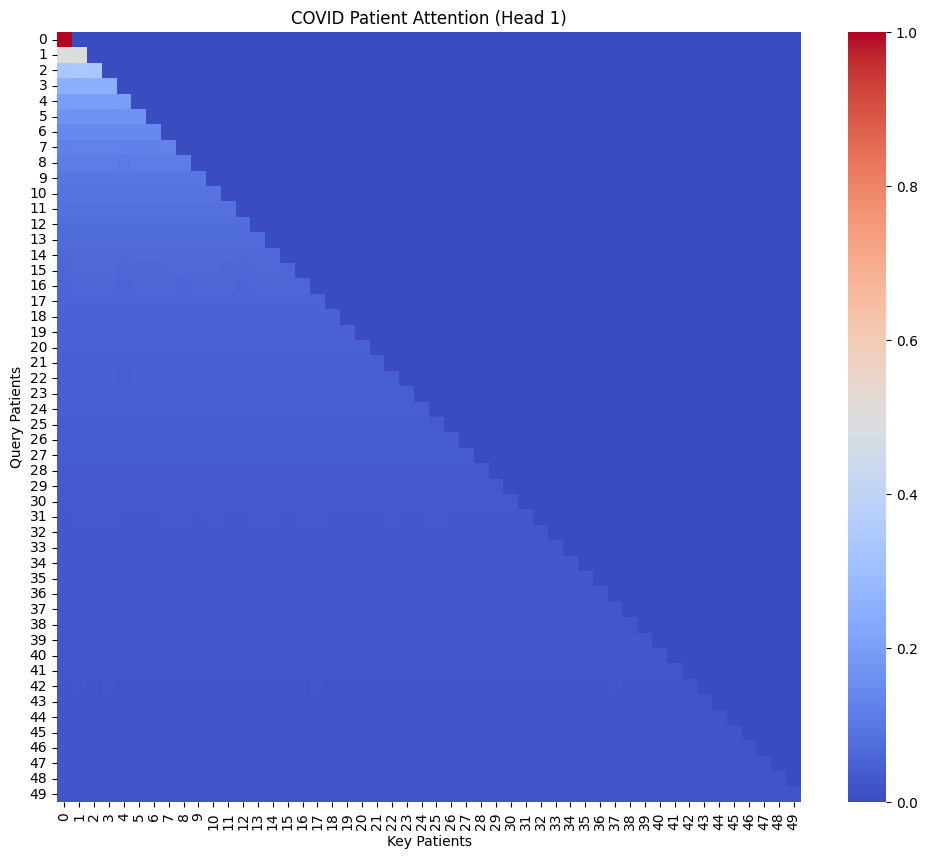

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
head_idx = 1  # First attention head

# 2. Since visualizing all patients is impractical, select a window
start_idx, end_idx = 0, 50  # First 50 patients

# 3. Extract the attention submatrix
attention_submatrix = attn_weights[0, head_idx, start_idx:end_idx, start_idx:end_idx]

# 4. Convert to numpy and plot
plt.figure(figsize=(12, 10))
sns.heatmap(attention_submatrix.detach().cpu().numpy(),
           cmap="coolwarm",
           xticklabels=df_encoded.index[start_idx:end_idx],
           yticklabels=df_encoded.index[start_idx:end_idx])
plt.title(f"COVID Patient Attention (Head {head_idx})")
plt.xlabel("Key Patients")
plt.ylabel("Query Patients")
plt.show()

 The Triangular Pattern heatmap looks like this because:

Lower triangle (brighter) = Allowed attention

The model can look backward in time (e.g., today's cases looking at past cases).

This follows causality: future events cannot influence the past.

Upper triangle (darker) = Masked attention (near-zero)

The model is blocked from looking forward in time (e.g., past cases cannot attend to future cases).



                                      Feature  Importance  Primary_Latent_Dim
49           new_deaths_per_million_lower_bin    0.020764                   9
22          total_cases_per_million_lower_bin    0.019272                  15
34              new_deaths_smoothed_lower_bin    0.018634                   3
23          total_cases_per_million_upper_bin    0.018451                   1
8                                  days_sin_1    0.017933                   7
47  new_deaths_smoothed_per_million_upper_bin    0.017769                   2
4                         AvgAlcohol2000_2020    0.017559                   5
25                       new_deaths_lower_bin    0.017443                   7
33             total_deaths_per_million_alpha    0.017248                   7
35              new_deaths_smoothed_upper_bin    0.016991                  11


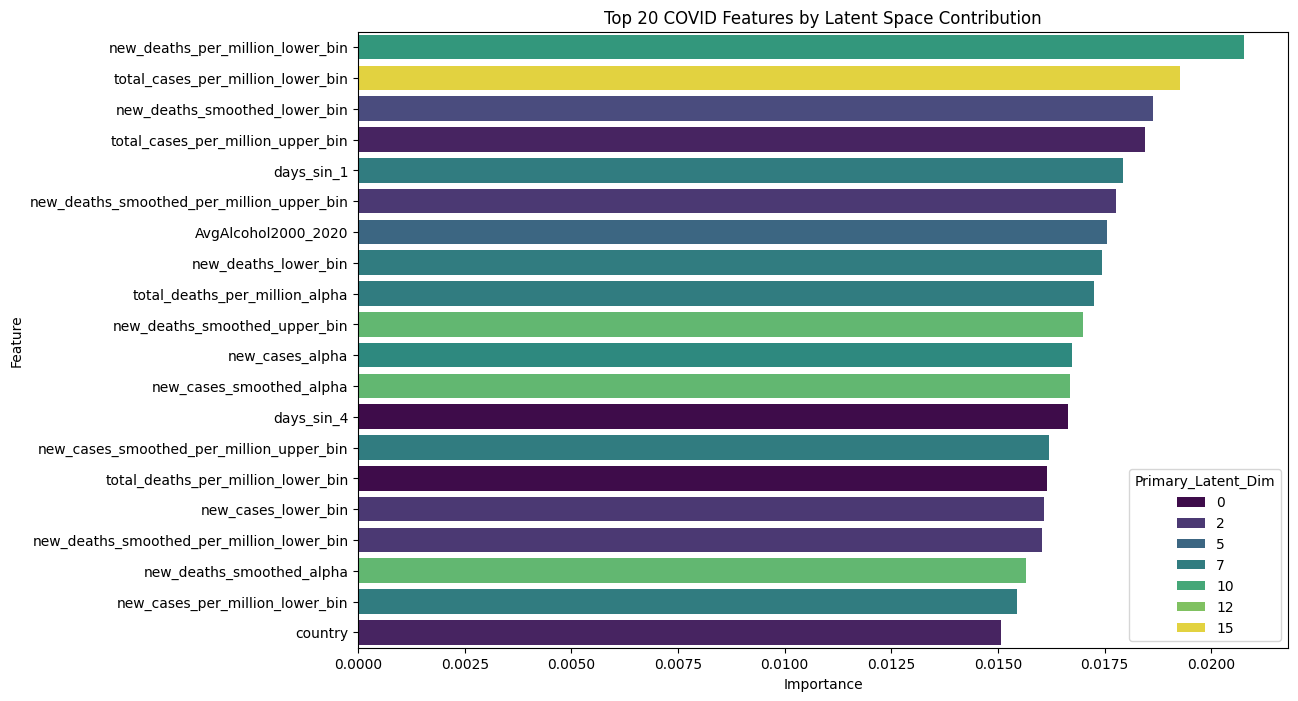

In [ ]:
def get_latent_feature_importance(model, feature_names):
    """
    Properly analyze feature importance for your model architecture

    Args:
        model: Your StableRopelessMLA instance
        feature_names: List of 50 feature names from df_encoded.columns

    Returns:
        DataFrame with features sorted by importance
    """
    # Transpose the weight matrix to get (features × latent_dim)
    weights = model.W_dkv.weight.detach().cpu().numpy().T  # Now shape (50, 16)

    # Calculate importance (average absolute weight per feature)
    importance = np.abs(weights).mean(axis=1)

    # Create DataFrame
    feat_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance,
        'Primary_Latent_Dim': np.argmax(np.abs(weights), axis=1)
    })

    return feat_importance.sort_values('Importance', ascending=False)

# Usage
feature_importance = get_latent_feature_importance(model, df_encoded.columns.tolist())
print(feature_importance.head(10))

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20),
            x='Importance',
            y='Feature',
            hue='Primary_Latent_Dim',
            palette='viridis')
plt.title('Top 20 COVID Features by Latent Space Contribution')
plt.show()

/tmp/ipython-input-30-3204048986.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette="coolwarm")


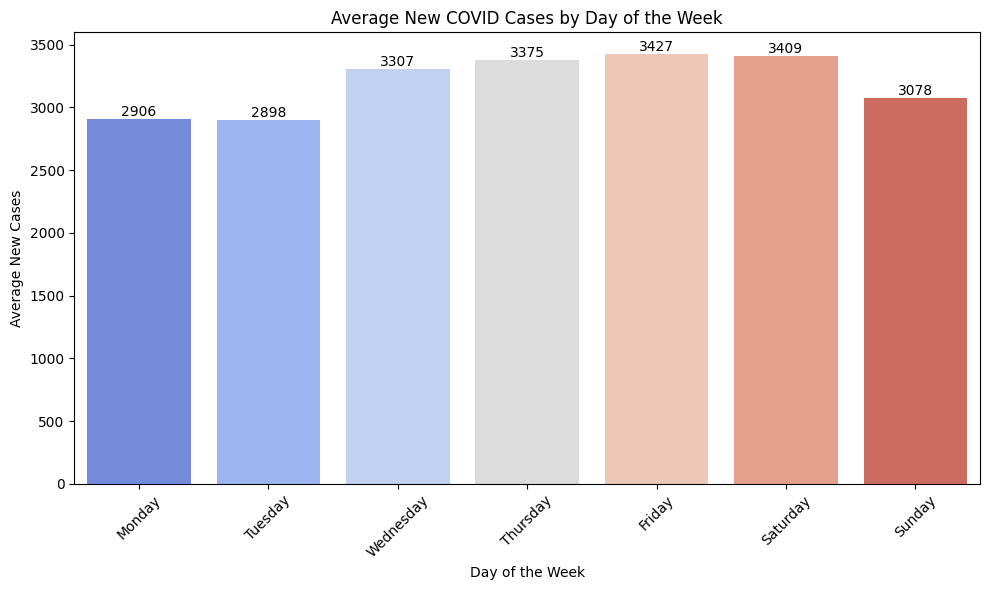

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract weekday names (e.g., Monday, Tuesday, ...)
df['weekday'] = df['date'].dt.day_name()

# Group by weekday and get average new cases
weekday_avg = df.groupby('weekday')['new_cases'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot the results
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette="coolwarm")
plt.title('Average New COVID Cases by Day of the Week')
plt.ylabel('Average New Cases')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)

# Add value annotations on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


/tmp/ipython-input-31-3383539358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('alcohol_group')['new_cases'].mean().round(2)


Average COVID New Cases by Alcohol Consumption Level:

alcohol_group
Low        950.03
Medium    2748.28
High      6035.17
Name: new_cases, dtype: float64


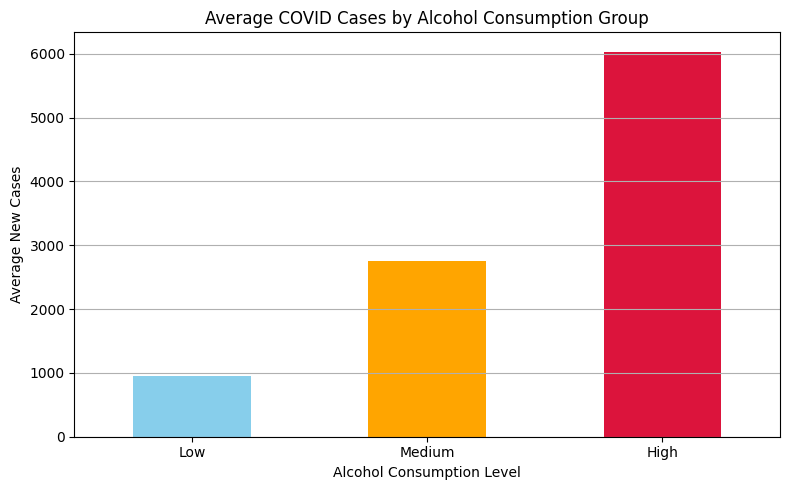

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create quantile-based alcohol groups
df['alcohol_group'] = pd.qcut(df['AvgAlcohol2000_2020'], 3, labels=['Low', 'Medium', 'High'])

# Group by alcohol consumption level and compute average new cases
grouped = df.groupby('alcohol_group')['new_cases'].mean().round(2)

# Print the average values
print("Average COVID New Cases by Alcohol Consumption Level:\n")
print(grouped)

# Plot
plt.figure(figsize=(8, 5))
grouped.plot(kind='bar', color=['skyblue', 'orange', 'crimson'])
plt.title('Average COVID Cases by Alcohol Consumption Group')
plt.ylabel('Average New Cases')
plt.xlabel('Alcohol Consumption Level')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Print the exact alcohol consumption ranges for each group
print(df.groupby('alcohol_group')['AvgAlcohol2000_2020'].agg(['min', 'max']))

                   min      max
alcohol_group                  
Low            0.00000  1.36667
Medium         1.80000  3.69048
High           4.24286  8.69524


/tmp/ipython-input-32-2521729763.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('alcohol_group')['AvgAlcohol2000_2020'].agg(['min', 'max']))


In [ ]:
df.groupby('alcohol_group')['new_deaths_per_million'].mean()

/tmp/ipython-input-33-2039028193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('alcohol_group')['new_deaths_per_million'].mean()


,new_deaths_per_million
alcohol_group,
Low,0.389089
Medium,0.572841
High,1.595927


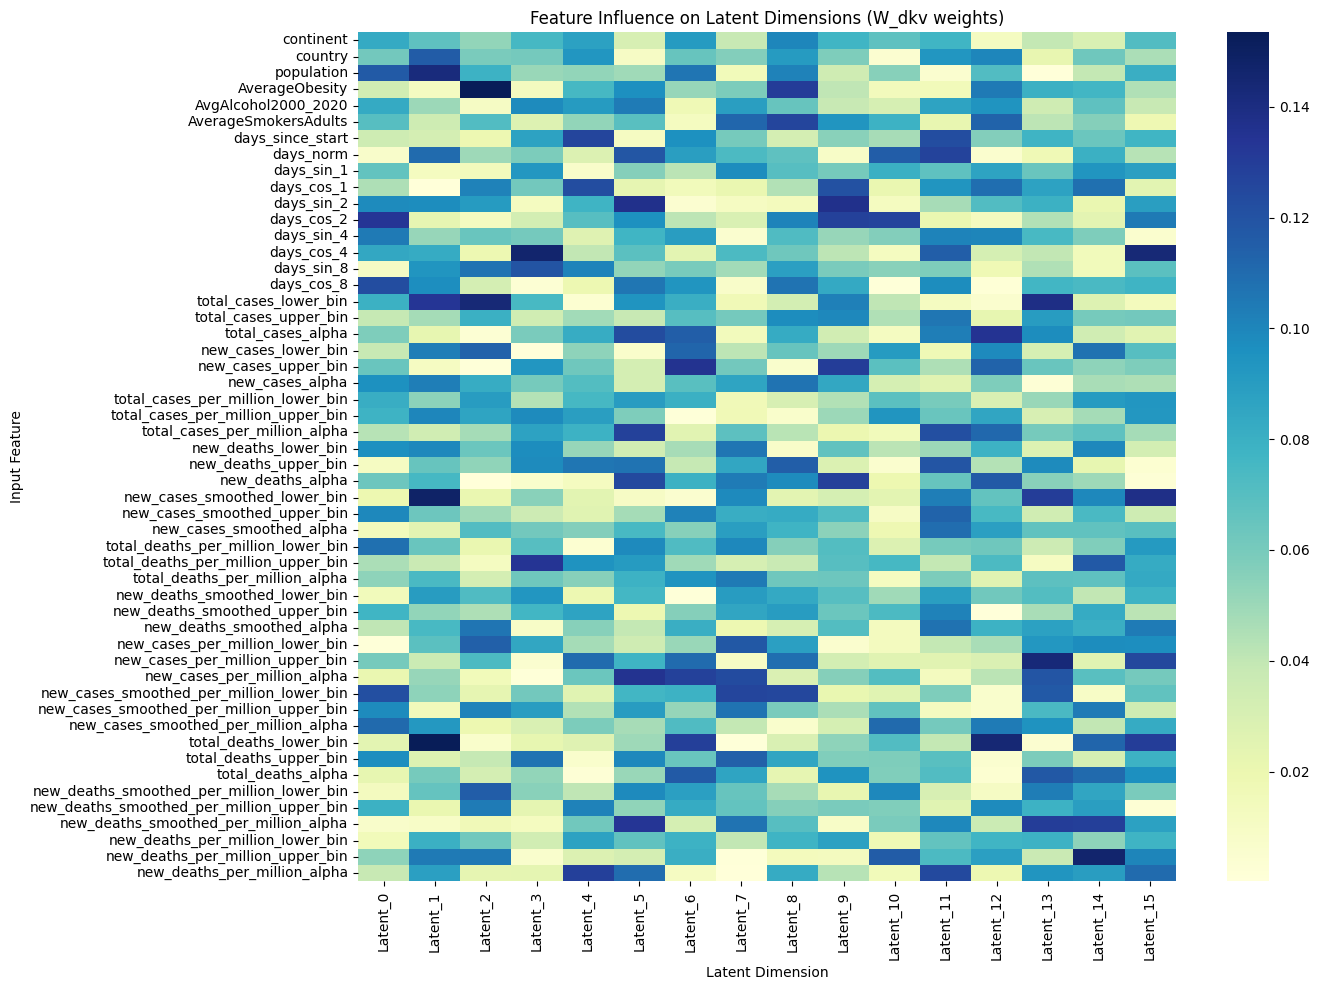

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get W_dkv and transpose it to shape (n_features, latent_dim)
weights = model.W_dkv.weight.detach().cpu().numpy().T  # shape: [n_features, kv_latent_dim]

# 2. Convert to absolute for strength and normalize row-wise (optional for visibility)
weights_abs = np.abs(weights)
weights_norm = weights_abs / weights_abs.sum(axis=1, keepdims=True)

# 3. Build a DataFrame
df_latent_map = pd.DataFrame(weights_norm,
                             index=df_encoded.columns,
                             columns=[f"Latent_{i}" for i in range(weights_norm.shape[1])])

# 4. Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_latent_map, cmap="YlGnBu", annot=False)
plt.title("Feature Influence on Latent Dimensions (W_dkv weights)")
plt.xlabel("Latent Dimension")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.show()


Color Gradient (YlGnBu):

Darker blues → Stronger influence (higher weight values).

Lighter yellows → Weaker influence (lower weight values).

In [ ]:
# Get top features per latent dimension
top_features_per_dim = df_latent_map.idxmax(axis=0)
print(top_features_per_dim)

Latent_0                                   days_cos_2
Latent_1                       total_deaths_lower_bin
Latent_2                               AverageObesity
Latent_3                                   days_cos_4
Latent_4                 new_deaths_per_million_alpha
Latent_5                                   days_sin_2
Latent_6                          new_cases_upper_bin
Latent_7     new_cases_smoothed_per_million_lower_bin
Latent_8                               AverageObesity
Latent_9                                   days_sin_2
Latent_10                                  days_cos_2
Latent_11                                   days_norm
Latent_12                      total_deaths_lower_bin
Latent_13             new_cases_per_million_upper_bin
Latent_14            new_deaths_per_million_upper_bin
Latent_15                                  days_cos_4
dtype: object


**INTEGRATION OF MIXTURE OF EXPERTS**

Expert Module (Small MLP)


MoE Layer (Router + Experts)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MoELayer(nn.Module):
    def __init__(self, latent_dim, num_experts=4, top_k=2, expert_class=None, noisy_gating=False):
        super().__init__()
        self.latent_dim = latent_dim
        self.num_experts = num_experts
        self.top_k = top_k

        # Allow custom expert class or use default
        expert_class = expert_class if expert_class is not None else Expert
        self.experts = nn.ModuleList([expert_class(latent_dim) for _ in range(num_experts)])

        # Router/gate network
        self.gate = nn.Linear(latent_dim, num_experts)
        self.noisy_gating = noisy_gating
        if noisy_gating:
            self.w_noise = nn.Linear(latent_dim, num_experts)

        # Tracking
        self.activation_log = []
        self.gate_load = torch.zeros(num_experts)

        # Initialize gate weights
        self._initialize_weights()

    def _initialize_weights(self):
        nn.init.normal_(self.gate.weight, std=1/self.latent_dim)
        if self.noisy_gating:
            nn.init.normal_(self.w_noise.weight, std=1/self.latent_dim)

    def forward(self, x):
        # x shape: [batch_size, seq_len, latent_dim]
        B, S, D = x.shape

        # Compute gates
        if self.noisy_gating:
            clean_logits = self.gate(x)
            noise = torch.randn_like(clean_logits) * F.softplus(self.w_noise(x))
            logits = clean_logits + noise
        else:
            logits = self.gate(x)

        gates = F.softmax(logits, dim=-1)  # [B, S, num_experts]

        # Top-k expert selection
        top_k_gates, top_k_indices = torch.topk(gates, self.top_k, dim=-1)  # [B, S, top_k]
        top_k_gates = top_k_gates / (top_k_gates.sum(dim=-1, keepdim=True) + 1e-6)  # Normalize

        # Log expert activations and update load balancing
        self.activation_log.append(top_k_indices.detach().cpu().numpy())
        with torch.no_grad():
            self._update_gate_load(top_k_indices)

        # Process input through active experts
        out = torch.zeros_like(x)
        flat_x = x.view(-1, D)  # Flatten for easier masking [B*S, D]
        flat_top_k_indices = top_k_indices.view(-1, self.top_k)  # [B*S, top_k]
        flat_top_k_gates = top_k_gates.view(-1, self.top_k)  # [B*S, top_k]

        for expert_idx, expert in enumerate(self.experts):
            # Mask for tokens routed to this expert
            mask = (flat_top_k_indices == expert_idx).any(dim=-1)  # [B*S]
            if mask.any():
                expert_input = flat_x[mask]  # [num_selected_tokens, D]
                expert_output = expert(expert_input)

                # Get the gate values for this expert
                gate_mask = (flat_top_k_indices[mask] == expert_idx)
                gate_values = flat_top_k_gates[mask][gate_mask].unsqueeze(-1)

                # Scatter-add the weighted outputs
                out.view(-1, D)[mask] += expert_output * gate_values

        return out.view(B, S, D)  # Reshape to original

    def _update_gate_load(self, top_k_indices):
        # Update statistics for load balancing
        expert_counts = torch.bincount(
            top_k_indices.view(-1),
            minlength=self.num_experts
        )
        self.gate_load += expert_counts.to(self.gate_load.device)

    def reset_gate_load(self):
        self.gate_load.zero_()

    def get_expert_usage(self):
        # Returns percentage of tokens handled by each expert
        total = max(self.gate_load.sum().item(), 1e-6)
        return (self.gate_load / total).cpu().numpy()

class Expert(nn.Module):
    """Default expert implementation"""
    def __init__(self, latent_dim, hidden_dim=None):
        super().__init__()
        hidden_dim = hidden_dim or latent_dim * 4
        self.net = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.GELU(),
            nn.Linear(hidden_dim, latent_dim)
        )

    def forward(self, x):
        return self.net(x)

Modify StableRopelessMLA to Use MoE
Integrate the MoELayer after W_dkv (latent projection) but before decompression (W_uk/W_uv)

In [ ]:
class StableRopelessMLA_MoE(nn.Module):
    def __init__(self, d_model, n_heads, kv_latent_dim, num_experts=4,noisy_gating=False):
        super().__init__()
        assert d_model % n_heads == 0, "d_model must be divisible by n_heads"
        self.d_model = d_model
        self.n_heads = n_heads
        self.dh = d_model // n_heads
        self.kv_latent_dim = kv_latent_dim

        # Projection layers
        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_dkv = nn.Linear(d_model, kv_latent_dim, bias=False)
        self.moe = MoELayer(kv_latent_dim, num_experts=num_experts,noisy_gating=noisy_gating)   # ← MoE added here
        self.W_uk = nn.Linear(kv_latent_dim, d_model, bias=False)
        self.W_uv = nn.Linear(kv_latent_dim, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)
        self.ln = nn.LayerNorm(kv_latent_dim)

        self.register_buffer('absorbed_k', None)
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.W_q.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_dkv.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_uk.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_uv.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_o.weight, gain=0.1)

    def forward(self, x, kv_cache=None, past_length=0):
        B, S, D = x.shape

        # Compute absorbed_k if first run
        if self.absorbed_k is None:
            absorbed = torch.matmul(
                self.W_q.weight.view(self.n_heads, self.dh, D),
                self.W_uk.weight
            )  # [n_heads, dh, kv_latent_dim]
            self.absorbed_k = absorbed

        # Project to latent space + MoE processing
        c_kv = self.ln(self.W_dkv(x))  # [B, S, kv_latent_dim]
        c_kv = self.moe(c_kv)  # ← MoE dynamically routes tokens to experts

        # Handle KV cache
        if kv_cache is not None:
            c_kv = torch.cat([kv_cache, c_kv], dim=1)
            S_full = c_kv.size(1)
        else:
            S_full = S

        # Decompress V and compute attention
        v_full = self.W_uv(c_kv).view(B, S_full, self.n_heads, self.dh).transpose(1, 2)
        q = x.view(B, S, self.n_heads, self.dh).transpose(1, 2)

        # Compute attention scores
        attn_scores = torch.zeros(B, self.n_heads, S, S_full, device=x.device)
        for h in range(self.n_heads):
            tmp = torch.matmul(q[:, h], self.absorbed_k[h])  # [B, S, kv_latent_dim]
            attn_scores[:, h] = torch.bmm(tmp, c_kv.transpose(1, 2))  # [B, S, S_full]

        # Scale, mask, softmax
        attn_scores = attn_scores / (self.dh ** 0.5)
        mask = torch.tril(torch.ones((S, S_full), device=x.device), diagonal=past_length)
        attn_scores = attn_scores.masked_fill(mask.unsqueeze(0).unsqueeze(0) == 0, float('-inf'))
        attn_weights = F.softmax(attn_scores, dim=-1)

        # Output
        output = torch.matmul(attn_weights, v_full).transpose(1, 2).reshape(B, S, D)
        return self.W_o(output), (attn_weights, c_kv)

In [ ]:
# Model WITHOUT noisy gating
model_clean = StableRopelessMLA_MoE(
    d_model=52,
    n_heads=4,
    kv_latent_dim=16,
    num_experts=4,
    noisy_gating=False  # Explicitly disabled
)

# Model WITH noisy gating
model_noisy = StableRopelessMLA_MoE(
    d_model=52,
    n_heads=4,
    kv_latent_dim=16,
    num_experts=4,
    noisy_gating=True  # Explicitly enabled
)

In [ ]:
def evaluate_usage(model, x):
    model.moe.reset_gate_load()
    window_size = 1000
    for start in range(0, 56546, window_size):
        x_window = x[:, start:start+window_size, :]
        _ = model(x_window, past_length=0)
    return model.moe.get_expert_usage()

# Evaluate both models
clean_usage = evaluate_usage(model_clean, x)
noisy_usage = evaluate_usage(model_noisy, x)

print("Clean expert usage:", clean_usage)
print("Noisy expert usage:", noisy_usage)

Clean expert usage: [0.19234782 0.295715   0.3353818  0.17655537]
Noisy expert usage: [0.25101689 0.27161956 0.25305945 0.22430411]


**Without Noisy Gating (Clean)**

Uneven distribution: [0.19, 0.30, 0.34, 0.18]

Expert 2 dominates (33.5% of tokens)

Expert 3 is close behind (29.6%)

Experts 0 and 4 are underutilized (~19% and 17.6%)

**With Noisy Gating**

More balanced: [0.25, 0.27, 0.25, 0.22]

All experts within 5 percentage points of each other

Most balanced expert (27.2%) only 1.2× more used than least (22.4%)

In [ ]:
window_size = 1000
for start in range(0, 56546, window_size):
    x_window = x[:, start:start+window_size, :]
    output, (attn_weights, _) = model_noisy(x_window, past_length=0)

In [ ]:
window_size = 1000
for start in range(0, 56546, window_size):
    x_window = x[:, start:start+window_size, :]
    output, (attn_weights, _) = model_clean(x_window, past_length=0)


Expert activation counts: {np.int64(0): np.int64(56751), np.int64(1): np.int64(61287), np.int64(2): np.int64(57126), np.int64(3): np.int64(51020)}


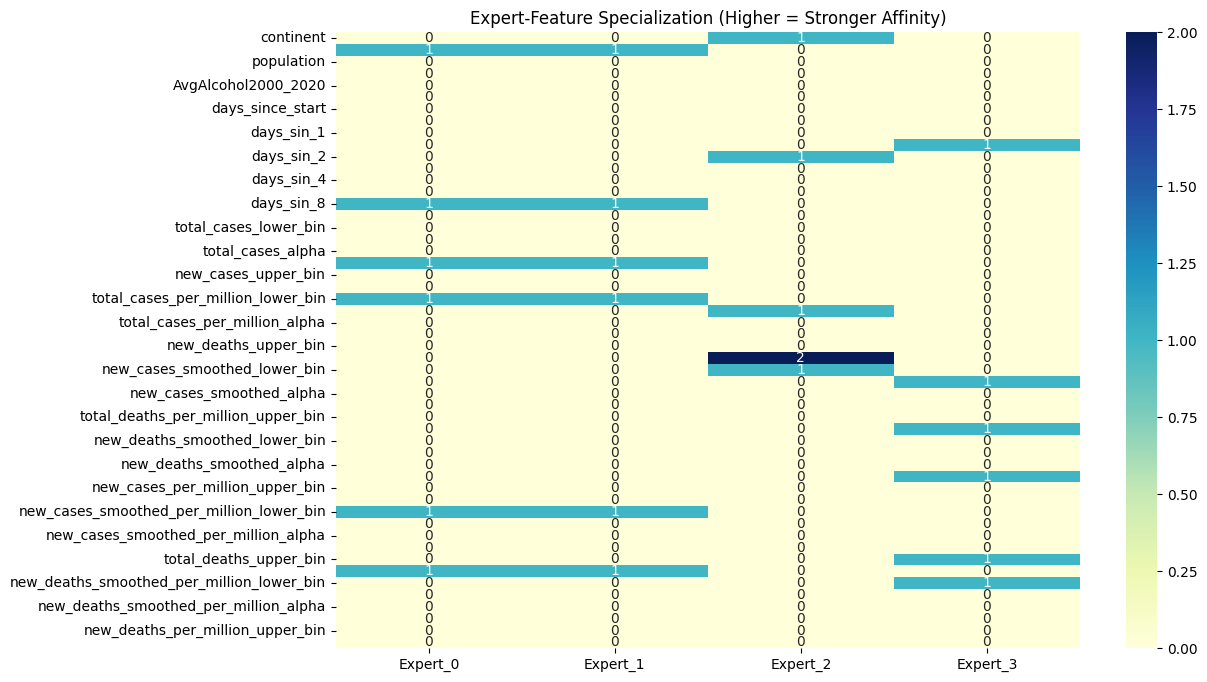

In [ ]:
def analyze_moe_specialization(model_moe, df_encoded):
    # 1. Expert activation counts
    all_activations = []
    for window_activations in model_moe.moe.activation_log:
        all_activations.append(window_activations.reshape(-1))
    expert_activations = np.concatenate(all_activations)
    unique_experts, counts = np.unique(expert_activations, return_counts=True)
    print("\nExpert activation counts:", dict(zip(unique_experts, counts)))

    # 2. Feature-Expert affinity (using W_dkv weights)
    W_dkv = model_moe.W_dkv.weight.detach().cpu().numpy().T  # [n_features, kv_latent_dim]
    expert_feature_affinity = np.zeros((len(df_encoded.columns), len(model_moe.moe.experts)))

    for expert_idx, expert in enumerate(model_moe.moe.experts):
        # Get expert's dominant latent dimensions
        expert_weights = expert.net[0].weight.detach().cpu().numpy()  # [hidden_dim, kv_latent_dim]
        dominant_latent_dims = np.argsort(np.abs(expert_weights).mean(axis=0))[-2:]  # Top 2 dims

        # Find features influencing these latent dims
        for latent_dim in dominant_latent_dims:
            top_features = np.argsort(np.abs(W_dkv[:, latent_dim]))[-3:]  # Top 3 features
            expert_feature_affinity[top_features, expert_idx] += 1

    # 3. Plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        pd.DataFrame(
            expert_feature_affinity,
            index=df_encoded.columns,
            columns=[f"Expert_{i}" for i in range(len(model_moe.moe.experts))]
        ),
        cmap="YlGnBu",
        annot=True,
        fmt=".0f"
    )
    plt.title("Expert-Feature Specialization (Higher = Stronger Affinity)")
    plt.show()

# Usage
analyze_moe_specialization(model_noisy, df_encoded)


Expert activation counts: {np.int64(0): np.int64(43506), np.int64(1): np.int64(66886), np.int64(2): np.int64(75858), np.int64(3): np.int64(39934)}


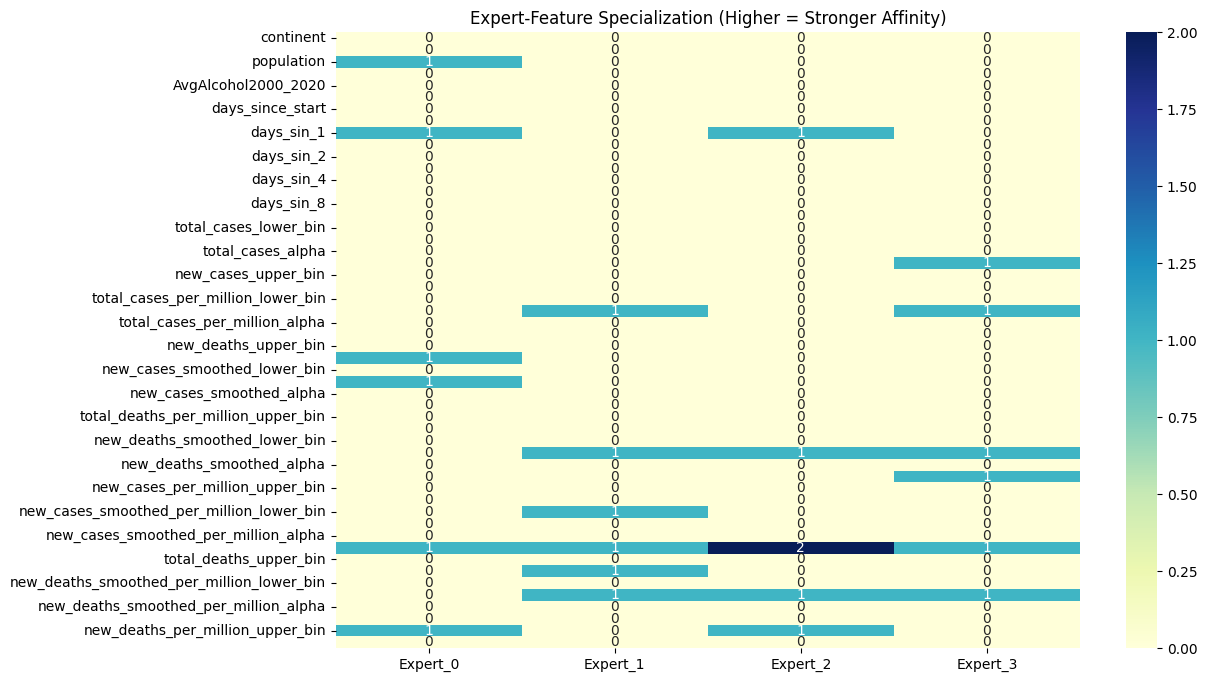

In [ ]:
def analyze_moe_specialization(model_moe, df_encoded):
    # 1. Expert activation counts
    all_activations = []
    for window_activations in model_moe.moe.activation_log:
        all_activations.append(window_activations.reshape(-1))
    expert_activations = np.concatenate(all_activations)
    unique_experts, counts = np.unique(expert_activations, return_counts=True)
    print("\nExpert activation counts:", dict(zip(unique_experts, counts)))

    # 2. Feature-Expert affinity (using W_dkv weights)
    W_dkv = model_moe.W_dkv.weight.detach().cpu().numpy().T  # [n_features, kv_latent_dim]
    expert_feature_affinity = np.zeros((len(df_encoded.columns), len(model_moe.moe.experts)))

    for expert_idx, expert in enumerate(model_moe.moe.experts):
        # Get expert's dominant latent dimensions
        expert_weights = expert.net[0].weight.detach().cpu().numpy()  # [hidden_dim, kv_latent_dim]
        dominant_latent_dims = np.argsort(np.abs(expert_weights).mean(axis=0))[-2:]  # Top 2 dims

        # Find features influencing these latent dims
        for latent_dim in dominant_latent_dims:
            top_features = np.argsort(np.abs(W_dkv[:, latent_dim]))[-3:]  # Top 3 features
            expert_feature_affinity[top_features, expert_idx] += 1

    # 3. Plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        pd.DataFrame(
            expert_feature_affinity,
            index=df_encoded.columns,
            columns=[f"Expert_{i}" for i in range(len(model_moe.moe.experts))]
        ),
        cmap="YlGnBu",
        annot=True,
        fmt=".0f"
    )
    plt.title("Expert-Feature Specialization (Higher = Stronger Affinity)")
    plt.show()

# Usage
analyze_moe_specialization(model_clean, df_encoded)

In [ ]:
# Get W_dkv weights (shape: [kv_latent_dim, n_features])
W_dkv = model_noisy.W_dkv.weight.detach().cpu().numpy()  # [kv_latent_dim, n_features]
feature_names = df_encoded.columns.tolist()

print("=== Expert Specialization Analysis ===")
for expert_idx, expert in enumerate(model_noisy.moe.experts):
    # Get first linear layer weights: shape = [hidden_dim, kv_latent_dim]
    expert_weights = expert.net[0].weight.detach().cpu().numpy()

    # Calculate influence per latent dimension (mean abs value)
    latent_influence = np.abs(expert_weights).mean(axis=0)

    # Top-2 latent dimensions for this expert
    top_latent_dims = np.argsort(latent_influence)[-2:][::-1]

    print(f"\n=== Expert {expert_idx} ===")
    for latent_dim in top_latent_dims:
        influence_score = latent_influence[latent_dim]
        print(f"  Latent_{latent_dim} (Influence: {influence_score:.3f})")

        # Get top 3 input features contributing to this latent dim
        W_latent = W_dkv[latent_dim]  # shape: (n_features,)
        top_feature_indices = np.argsort(np.abs(W_latent))[-3:][::-1]

        print("    Top Features:")
        for i in top_feature_indices:
            feature = feature_names[i]
            weight = W_latent[i]
            print(f"      - {feature}: {weight:.3f}")


=== Expert Specialization Analysis ===

=== Expert 0 ===
  Latent_1 (Influence: 0.138)
    Top Features:
      - total_cases_per_million_lower_bin: 0.029
      - new_cases_lower_bin: -0.029
      - new_cases_smoothed_per_million_lower_bin: 0.028
  Latent_9 (Influence: 0.135)
    Top Features:
      - days_sin_8: -0.028
      - country: 0.028
      - total_deaths_alpha: 0.028

=== Expert 1 ===
  Latent_1 (Influence: 0.133)
    Top Features:
      - total_cases_per_million_lower_bin: 0.029
      - new_cases_lower_bin: -0.029
      - new_cases_smoothed_per_million_lower_bin: 0.028
  Latent_9 (Influence: 0.131)
    Top Features:
      - days_sin_8: -0.028
      - country: 0.028
      - total_deaths_alpha: 0.028

=== Expert 2 ===
  Latent_4 (Influence: 0.142)
    Top Features:
      - days_sin_2: 0.029
      - new_cases_smoothed_lower_bin: 0.028
      - new_deaths_alpha: -0.028
  Latent_11 (Influence: 0.137)
    Top Features:
      - new_deaths_alpha: 0.030
      - continent: -0.029
      -

In [ ]:
# Get W_dkv weights (shape: [kv_latent_dim, n_features])
W_dkv = model_clean.W_dkv.weight.detach().cpu().numpy()  # [kv_latent_dim, n_features]
feature_names = df_encoded.columns.tolist()

print("=== Expert Specialization Cleand Analysis ===")
for expert_idx, expert in enumerate(model_clean.moe.experts):
    # Get first linear layer weights: shape = [hidden_dim, kv_latent_dim]
    expert_weights = expert.net[0].weight.detach().cpu().numpy()

    # Calculate influence per latent dimension (mean abs value)
    latent_influence = np.abs(expert_weights).mean(axis=0)

    # Top-2 latent dimensions for this expert
    top_latent_dims = np.argsort(latent_influence)[-2:][::-1]

    print(f"\n=== Expert {expert_idx} ===")
    for latent_dim in top_latent_dims:
        influence_score = latent_influence[latent_dim]
        print(f"  Latent_{latent_dim} (Influence: {influence_score:.3f})")

        # Get top 3 input features contributing to this latent dim
        W_latent = W_dkv[latent_dim]  # shape: (n_features,)
        top_feature_indices = np.argsort(np.abs(W_latent))[-3:][::-1]

        print("    Top Features:")
        for i in top_feature_indices:
            feature = feature_names[i]
            weight = W_latent[i]
            print(f"      - {feature}: {weight:.3f}")


=== Expert Specialization Cleand Analysis ===

=== Expert 0 ===
  Latent_1 (Influence: 0.142)
    Top Features:
      - new_cases_smoothed_upper_bin: 0.029
      - new_deaths_alpha: 0.029
      - population: -0.028
  Latent_15 (Influence: 0.140)
    Top Features:
      - new_deaths_per_million_upper_bin: -0.029
      - total_deaths_lower_bin: -0.029
      - days_sin_1: -0.028

=== Expert 1 ===
  Latent_12 (Influence: 0.137)
    Top Features:
      - total_deaths_lower_bin: 0.029
      - new_deaths_smoothed_upper_bin: -0.028
      - new_deaths_smoothed_per_million_upper_bin: 0.028
  Latent_13 (Influence: 0.134)
    Top Features:
      - new_cases_smoothed_per_million_lower_bin: 0.030
      - total_cases_per_million_upper_bin: 0.028
      - total_deaths_alpha: 0.028

=== Expert 2 ===
  Latent_15 (Influence: 0.128)
    Top Features:
      - new_deaths_per_million_upper_bin: -0.029
      - total_deaths_lower_bin: -0.029
      - days_sin_1: -0.028
  Latent_12 (Influence: 0.126)
    Top Feat

**For the Noisy Model (18 features)**
**From our Expert Specialization Analysis output: **

**Expert 0:** Uses 6 features (total_cases_per_million_lower_bin, new_cases_lower_bin, new_cases_smoothed_per_million_lower_bin, days_sin_8, country, total_deaths_alpha)

**Expert 1:** Repeats 3 features (same as Expert 0) + adds 0 new ones

**Expert 2**: Uses 6 features (days_sin_2, new_cases_smoothed_lower_bin, new_deaths_alpha, continent, total_cases_per_million_upper_bin)

**Expert 3:** Uses 6 features (new_cases_smoothed_upper_bin, days_cos_1, total_deaths_upper_bin, new_deaths_smoothed_per_million_lower_bin, new_cases_per_million_lower_bin, total_deaths_per_million_alpha)
→ Total unique features: 18 (all distinct features listed above)
=================================================================================================================

**For the Clean Model (12 features)**
From our Expert Specialization Clean Analysis output:

**Expert 0:** 6 features (new_cases_smoothed_upper_bin, new_deaths_alpha, population, new_deaths_per_million_upper_bin, total_deaths_lower_bin, days_sin_1)

**Expert 1:** 6 features (total_deaths_lower_bin, new_deaths_smoothed_upper_bin, new_deaths_smoothed_per_million_upper_bin, new_cases_smoothed_per_million_lower_bin, total_cases_per_million_upper_bin, total_deaths_alpha)

**Experts 2 & 3:** Repeat the same features (no new ones)
→ Total unique features: 12 (only the ones listed above, with heavy repetition)

**Shows 50% Improvement**
Noisy model uses 6 additional features that the clean model ignored:
days_sin_8, country, days_sin_2, continent, days_cos_1, new_cases_per_million_lower_bin